# Test agents and framework

## Imports

In [ ]:
import gymnasium as gym
import global_config 
from environment import *
from env_wrappers import *
from matplotlib import pyplot as plt
from general_utils import *
from delay_model import *
from test_utils import *
from train_utils import *
from orchestrator import *
import pandas as pd


%load_ext autoreload
%autoreload 2 

plt.rcParams['font.family'] = 'serif'

In [61]:
agent_official_names = {
    'sac' : 'SAC (no delay)',
    'aqsac' : 'AQ-SAC',
    'maqsac' : 'MAQ-SAC',
    'dqsac' : 'DQ-SAC',
    'mdqsac' : 'MDQ-SAC',
    'drsac' : 'DRSAC'
}

## Spherical tank example

### Training examples

#### SAC

In [ ]:
env_class = SphericalTank
seed = 0

agent_type = 'sac'
safe_agent_type = 'aqsac'
# Whether to use average or min Q
avg_q = True
n_episodes = 200
observation_type = 'setpoint-error'
randomise_setpoint = True

# Whether to use random delay for safe agent training
random_delay = True

# Entropy coefficient for the safe agent
ent_coef = 0.5

# Set the setpoint for the environment
# If randomise_setpoint is True, this value will only be used for saving the agent
setpoint = 3.0
if isinstance(setpoint, float): 
        setpoint = [setpoint]

core_env = env_class(seed=seed, desired_state=np.array(setpoint))

# By default the observation is rescaled to be between -1 and 1
rescale_observation = True
randomised_str = 'randomised' if randomise_setpoint else 'fixed'

optimal_agent, env = train_default_agent(core_env = core_env, 
                                 agent_type= agent_type,
                                 desired_state= setpoint, 
                                 seed = seed, 
                                 n_episodes = n_episodes, 
                                 observation_type= observation_type, 
                                 randomise_setpoint= randomise_setpoint, 
                                 rescale_observation= rescale_observation)

#### AQSAC

In [ ]:
env_class = SphericalTank
seed = 0

agent_type = 'sac'
safe_agent_type = 'aqsac'
# Whether to use average or min Q
avg_q = True
n_episodes = 200
observation_type = 'setpoint-error'
randomise_setpoint = True

# Whether to use random delay for safe agent training
random_delay = True

# Entropy coefficient for the safe agent
ent_coef = 0.5

# Set the setpoint for the environment
# If randomise_setpoint is True, this value will only be used for saving the agent
setpoint = 3.0
if isinstance(setpoint, float): 
        setpoint = [setpoint]

core_env = env_class(seed=seed, desired_state=np.array(setpoint))

# By default the observation is rescaled to be between -1 and 1
rescale_observation = True
randomised_str = 'randomised' if randomise_setpoint else 'fixed'


if avg_q == False and agent_type == 'augsac':
    print(f"Training Augmented SAC with min Q is the same as using average.")
      
aqsac_agent, env, delay_history, setpoint_history = train_default_augmented_agent(core_env = core_env, 
                                              agent_type= safe_agent_type,
                                              desired_state= setpoint,
                                              seed = seed,
                                              observation_type= observation_type,
                                              randomise_setpoint= randomise_setpoint, 
                                              random_delay= random_delay,
                                              average_q=avg_q,
                                              n_episodes= n_episodes, 
                                              ent_coef= ent_coef,
                                              save=False)


#### DRSAC

In [ ]:
env_class = SphericalTank
seed = 0

agent_type = 'sac'
safe_agent_type = 'drsac'
# Whether to use average or min Q
avg_q = True
n_episodes = 200
observation_type = 'setpoint-error'
randomise_setpoint = True

# Whether to use random delay for safe agent training
random_delay = True

# Entropy coefficient for the safe agent
ent_coef = 0.5

# Set the setpoint for the environment
# If randomise_setpoint is True, this value will only be used for saving the agent
setpoint = 3.0
if isinstance(setpoint, float): 
        setpoint = [setpoint]

core_env = env_class(seed=seed, desired_state=np.array(setpoint))

# By default the observation is rescaled to be between -1 and 1
rescale_observation = True
randomised_str = 'randomised' if randomise_setpoint else 'fixed'

if avg_q == False and agent_type == 'drsac':
    print(f"Training Augmented SAC with min Q is the same as using average.")
      
drsac_agent, env, delay_history, setpoint_history = train_default_augmented_agent(core_env = core_env, 
                                              agent_type= safe_agent_type,
                                              desired_state= setpoint,
                                              seed = seed,
                                              observation_type= observation_type,
                                              randomise_setpoint= randomise_setpoint, 
                                              random_delay= random_delay,
                                              average_q=avg_q,
                                              n_episodes= n_episodes, 
                                              ent_coef= ent_coef,
                                              save=False)


### Test delay-informed agent
In the same loop it's possible to test also non-delayed agent, by informing the delay-informed that the delay = 0. 

c:\Users\seigpaw\AppData\Local\Programs\Python\Python310\lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.desired_state to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.desired_state` for environment variables or `env.get_wrapper_attr('desired_state')` that will search the reminding wrappers.
  logger.warn(
c:\Users\seigpaw\AppData\Local\Programs\Python\Python310\lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.state_space_violation to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.state_space_violation` for environment variables or `env.get_wrapper_attr('state_space_violation')` that will search the reminding wrappers.
  logger.warn(


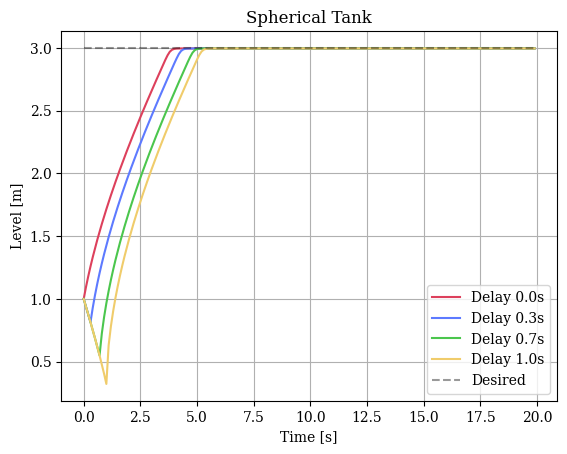

In [53]:
agent_type = 'sac'

delay = 0
max_episode_len = 200




y_labels = {
    'SphericalTank' : 'Level [m]'
}

# 2 by 2 plot
# f, ax = plt.subplots(2,2, figsize = (12,6))

colors = ['cold_red', 'warm_blue', 'warm_green', 'warm_yellow', 'warm_purple','dark_pink']
titles = ['Linear Velocity', 'Non-linear velocity', 'Position', 'Spherical Tank']
delays = [0,3,7,10]
for d, delay in enumerate(delays):
    core_env = SphericalTank(desired_state=np.array([3.0]), start_state=np.array([1.0]), max_episode_len=max_episode_len)
    env = init_wrappers(core_env, observation_type='setpoint-error', randomise_setpoint = False, rescale_observation= rescale_observation)
    delay_informed = DelayInformedAgent(undelayed_agent=optimal_agent, env_model = copy.deepcopy(env), init_delay = delay)
    env = DelayAction(env, delay = delay)
    env = AugmentState(env, known_delay=10)
    states, actions, rewards, avg, executed = test_agent(delay_informed, env,  deterministic=True, state_error=True)
    time_seconds = np.array([i/10 for i in range(len(states))])
    desired = env.desired_state

    plt.plot(time_seconds, states, label = f"Delay {delay/10}s", color = global_config.COLORS[colors[d]])
    
# Plot desired state
plt.plot(time_seconds, [desired for i in range(len(states))], label = 'Desired', linestyle = '--', color = 'black', alpha = 0.4)

plt.legend()
plt.xlabel(r'Time [s]')
plt.ylabel(y_labels['SphericalTank'])
plt.title('Spherical Tank')
plt.grid()




### Test delay-safe agent
Here showed on variable delay case

In [ ]:
delays = [0,3,7,10]


env_name = 'SphericalTank'
agent_types = [ 'drsac','aqsac']
agents_dict = {
    'drsac' : drsac_agent,
    'aqsac' : aqsac_agent
}
colors = ['warm_blue', 'cold_red']

f, ax = plt.subplots(3,1, figsize = (10,9))
desired_plotted = False
for agent_type in agent_types:
        core_env = SphericalTank(desired_state=np.array([3.5, 2.0, 0.5]), max_episode_len=1000, seed = 12, start_state=np.array([1.5]))
        core_env = init_wrappers(core_env, observation_type='setpoint-error')
        env = VariableActionDelay(core_env, max_delay=10, init_delay=0, update_freq=100, delay_type='external')
        env = AugmentState(env, known_delay=10)
        states, actions, rewards, avg_rewards, executed = test_agent(agents_dict[agent_type], env, deterministic=True, state_error=True)
    
        time_seconds = np.array([i/10 for i in range(len(states))])

        ax[0].plot(time_seconds, np.array(env.ep_delay_history)/10, global_config.COLORS['dark_orange'], alpha = 0.7)

        actions_rescaled = scale_range(np.array(actions)[:env.unwrapped.max_episode_len,0],-1,1,env.unwrapped.action_space.low, env.unwrapped.action_space.high)
        if env.desired_trajectory is not None and len(env.desired_trajectory) == len(time_seconds) and not desired_plotted:
            ax[1].plot(time_seconds, env.desired_trajectory, label = 'Desired', linestyle = '--', color = 'black', alpha = 0.4)
            desired_plotted = True
        # Plot states, rewards and actions
        try:
            ax[1].plot(time_seconds, np.array(states), label = f"{agent_official_names[agent_type]}", color = global_config.COLORS[colors[agent_types.index(agent_type)]])
            ax[2].plot(time_seconds, actions_rescaled, label = f"{agent_official_names[agent_type]}", color = global_config.COLORS[colors[agent_types.index(agent_type)]])
        except: 
            ax[1].plot(time_seconds[:len(states)], np.array(states), label = f"{agent_official_names[agent_type]}", color = global_config.COLORS[colors[agent_types.index(agent_type)]])
            ax[2].plot(time_seconds[:len(actions)], actions_rescaled, label = f"{agent_official_names[agent_type]}", color = global_config.COLORS[colors[agent_types.index(agent_type)]])
        
        ax[1].set_title(f"State")


ax[1].set_xlabel(r'Time [s]')
ax[1].set_ylabel(f'Level [m]')
ax[1].legend()
ax[1].legend(loc = 'upper right')
ax[1].grid(True)
ax[0].grid(True)
ax[0].set_ylabel(r'Delay [s]')

ax[2].set_title(f"Action")
ax[2].set_xlabel(r'Time [s]')
ax[2].set_ylabel(r'Inflow [$\frac{m^3}{s}$]')
ax[2].legend()
ax[2].grid(True)



ax[0].set_title('Delay trajectory')

f.tight_layout(pad = 1.0)

### Test the entire framework

In [ ]:

core_env = SphericalTank(desired_state=np.array([2.0,3.5, 0.5]), max_episode_len=1000, seed = 89, start_state=np.array([1.5]))
core_env = init_wrappers(core_env, observation_type='setpoint-error')
print(f"Core env episode length: {core_env.max_episode_len}")
agent_type = 'aqsac'
safe_agent = aqsac_agent

tank_agent = optimal_agent
delay_informed_agent = DelayInformedAgent(undelayed_agent=tank_agent, env_model = copy.deepcopy(core_env), init_delay = 0)
estimator = IterativeEstimator(core_env.unwrapped.observation_space.shape[0], decay = 0.89, scaling_factor=200, max_delay=10)
orch = Orchestrator(delay_informed_agent= delay_informed_agent, 
                    safe_agent = safe_agent,
                    delay_model = estimator,
                    transition_steps= 5,
                    certainty_threshold= 0.8, 
                    noise_level=0.05)

orch.reset()
env = VariableActionDelay(core_env, max_delay=10, init_delay=0, update_freq=100, delay_type='external', keep_trajectory=True)

env = AugmentState(env, known_delay=10)
states, actions, rewards, avg_rewards, executed = test_agent(orch, env, deterministic=True, state_error=True)

time_seconds = np.array([i/10 for i in range(len(states))])
states = np.array(states)
desired = env.unwrapped.desired_trajectory

f, ax = plt.subplots(5,1, figsize = (10,15))
ax[0].plot(time_seconds, np.array(env.ep_delay_history)[:1000] * env.unwrapped.Ts, label = 'True delay', linestyle = '--', color = 'black', alpha = 0.4)
ax[0].plot(time_seconds, np.array(orch.delay_pred_history) * env.unwrapped.Ts, label = r'Predicted, $\sigma = 0.05$', color = global_config.COLORS['warm_blue'])
ax[0].grid()
# ax[0].legend()
ax[0].set_title('Action delay')
ax[0].set_xlabel(r'Time [s]')
ax[0].set_ylabel(r'Delay [s]')
ax[1].plot(time_seconds, desired, label = 'Desired', linestyle = '--', color = 'black', alpha = 0.4)
ax[1].plot(time_seconds, states, label = r'$\sigma = 0.05$', color = global_config.COLORS['warm_blue'], zorder = 5)


ax[1].grid()
ax[1].set_title('States')
ax[1].set_xlabel(r'Time [s]')
ax[1].set_ylabel(r'Fluid level [m]')
ax[2].plot(time_seconds, np.array(orch.delay_certainty_history)*100, label = r'$\sigma = 0.05$', color = global_config.COLORS['warm_blue'])
# ax[2].legend()
ax[2].grid()
ax[2].set_title(r'Delay prediction certainty')
ax[2].set_xlabel(r'Time [s]')
ax[2].set_ylabel(r'Certainty [%]')

ax[3].plot(time_seconds, scale_range(np.array(actions)[:len(states)], -1, 1, env.unwrapped.action_space.low, env.unwrapped.action_space.high), 
           label = r'$\sigma = 0.05$', color = global_config.COLORS['warm_blue'], zorder = 5)
ax[3].set_title(r'Actions')
ax[3].set_xlabel(r'Time [s]')
ax[3].set_ylabel(r'Inflow [$\frac{m^3}{s}$]')
ax[3].grid()

ax[4].plot(time_seconds, np.array(orch.transition_manager.beta_history), label = r'$\sigma = 0.05$' , color = global_config.COLORS['warm_blue'])
ax[4].set_title(r'Beta')
ax[4].set_xlabel(r'Time [s]')
ax[4].set_ylabel(r'Beta')
ax[4].grid()

ax[0].legend(loc = 'lower right')
ax[2].legend()
ax[3].legend()
ax[1].legend()
ax[4].legend()

f.tight_layout(pad = 1.0)




## Ship velocity example

### Train agents

#### SAC

In [ ]:
env_class = ShipVelocity
seed = 85

setpoint = [2.9256, 0.2956, 0.0]
if isinstance(setpoint, float): 
        setpoint = [setpoint]

core_env = env_class(seed=seed, desired_state=np.array(setpoint))

agent_type = 'sac'
n_episodes = 500
observation_type = 'setpoint-error'
randomise_setpoint = True
rescale_observation = True


optimal_agent_ship, env = train_default_agent(core_env = core_env, 
                                 agent_type= agent_type,
                                 desired_state= setpoint, 
                                 seed = seed, 
                                 n_episodes = n_episodes, 
                                 observation_type= observation_type, 
                                 randomise_setpoint= randomise_setpoint, 
                                 rescale_observation= rescale_observation)

#### AQSAC

In [ ]:
env_class = ShipVelocity
seed = 85

agent_type = 'sac'
safe_agent_type = 'aqsac'
# Whether to use average or min Q
avg_q = True
n_episodes = 500
observation_type = 'setpoint-error'
randomise_setpoint = True

# Whether to use random delay for safe agent training
random_delay = True

# Entropy coefficient for the safe agent
ent_coef = 0.5

# Set the setpoint for the environment
# If randomise_setpoint is True, this value will only be used for saving the agent
setpoint = [2.9256, 0.2956, 0.0]
if isinstance(setpoint, float): 
        setpoint = [setpoint]

core_env = env_class(seed=seed, desired_state=np.array(setpoint))

# By default the observation is rescaled to be between -1 and 1
rescale_observation = True
randomised_str = 'randomised' if randomise_setpoint else 'fixed'
if avg_q == False and agent_type == 'augsac':
    print(f"Training Augmented SAC with min Q is the same as using average.")
      
aqsac_agent_ship, env, delay_history, setpoint_history = train_default_augmented_agent(core_env = core_env, 
                                              agent_type= safe_agent_type,
                                              desired_state= setpoint,
                                              seed = seed,
                                              observation_type= observation_type,
                                              randomise_setpoint= randomise_setpoint, 
                                              random_delay= random_delay,
                                              average_q=avg_q,
                                              n_episodes= n_episodes, 
                                              ent_coef= ent_coef,
                                              save=False)


#### DRSAC

In [ ]:
env_class = ShipVelocity
seed = 85

agent_type = 'sac'
safe_agent_type = 'drsac'
# Whether to use average or min Q
avg_q = True
n_episodes = 500
observation_type = 'setpoint-error'
randomise_setpoint = True

# Whether to use random delay for safe agent training
random_delay = True

# Entropy coefficient for the safe agent
ent_coef = 0.5

# Set the setpoint for the environment
# If randomise_setpoint is True, this value will only be used for saving the agent
setpoint = [2.9256, 0.2956, 0.0]
if isinstance(setpoint, float): 
        setpoint = [setpoint]

core_env = env_class(seed=seed, desired_state=np.array(setpoint))

# By default the observation is rescaled to be between -1 and 1
rescale_observation = True
randomised_str = 'randomised' if randomise_setpoint else 'fixed'

if avg_q == False and agent_type == 'drsac':
    print(f"Training Augmented SAC with min Q is the same as using average.")
      
drsac_agent_ship, env, delay_history, setpoint_history = train_default_augmented_agent(core_env = core_env, 
                                              agent_type= safe_agent_type,
                                              desired_state= setpoint,
                                              seed = seed,
                                              observation_type= observation_type,
                                              randomise_setpoint= randomise_setpoint, 
                                              random_delay= random_delay,
                                              average_q=avg_q,
                                              n_episodes= n_episodes, 
                                              ent_coef= ent_coef,
                                              save=False)


### Test delay-safe agents

In [ ]:
f, ax = plt.subplot_mosaic([['Delay', 'Delay', 'Delay'], ['X velocity', 'Y velocity', 'Angular velocity'], ['Fx', 'Fy', 'Mr']], figsize = (10,8), gridspec_kw={'height_ratios': [1.2, 2, 2]})
print(ax['Delay'])

agent_types = ['sac', 'drsac', 'aqsac']
agents_dict = {
    'sac' : optimal_agent_ship,
    'drsac' : drsac_agent_ship,
    'aqsac' : aqsac_agent_ship
}
colors = ['warm_yellow','warm_blue', 'cold_red', 'warm_green' , 'warm_purple','dark_pink']
desired_plotted = False
delay_plotted = False

test_env = ShipVelocity(start_state=np.array([0.0,0.0,0.0]), desired_state=np.array([7, 1.0, 0.23]), seed = 95, max_episode_len=600)
test_env = init_wrappers(test_env, 'setpoint-error', False, True, True)
test_env = VariableActionDelay(test_env, init_delay=5, keep_trajectory=True, max_delay=5, delay_type='external', update_freq=50)


for i, agent_type in enumerate(agent_types): 
        
        agent = agents_dict[agent_type]

        if agent_type != 'sac' and not isinstance(test_env, AugmentState):
            test_env = AugmentState(test_env, known_delay=5)

        states, actions, rewards, avg_rewards, executed_actions = test_agent(agent, 
                                                                            test_env, 
                                                                            seed = None, 
                                                                            deterministic = True, 
                                                                            state_error = True, 
                                                                            )

        states = np.array(states)
        actions = scale_range(np.array(actions), -1,1,test_env.unwrapped.action_space.low, test_env.unwrapped.action_space.high)

        if not delay_plotted:
            ax['Delay'].plot(test_env.ep_delay_history[:test_env.max_episode_len], 'k--', alpha = 0.7, label = f'Delay')
            delay_plotted = True
        # print(f"Plotting history of {agent_official_names[agent_type]} with idx {i * (test_env.max_episode_len)} and {(i+1) * test_env.max_episode_len}")
        
        if not desired_plotted:
            for axx, key in enumerate(['X velocity', 'Y velocity', 'Angular velocity']):
                ax[key].plot([test_env.desired_state[axx] for _ in range(len(states[:,axx]))],'k--', alpha = 0.7, label = 'Desired')
            desired_plotted = True

        for axx, key in enumerate(['X velocity', 'Y velocity', 'Angular velocity']):
            ax[key].plot(states[:,axx], label = agent_official_names[agent_type], color = global_config.COLORS[colors[i]])
            
        for axx, key in enumerate(['Fx', 'Fy', 'Mr']):
            ax[key].plot(actions[:,axx], label = agent_official_names[agent_type], color = global_config.COLORS[colors[i]])

for key in ax.keys():
    ax[key].grid()
    ax[key].set_title(key)
    ax[key].set_xlabel(r'Time [s]')



ax['X velocity'].legend()

# Y Labels 
ax['Delay'].set_ylabel('Delay [s]')
ax['X velocity'].set_ylabel(r'Velocity $u\ [\frac{m}{s}]$')
ax['Y velocity'].set_ylabel(r'Velocity $v\ [\frac{m}{s}]$')
ax['Angular velocity'].set_ylabel(r'Angular velocity $r\ [\frac{rad}{s}]$')
ax['Fx'].set_ylabel(r'Force $F_x\ [MN]$')
ax['Fy'].set_ylabel(r'Force $F_y\ [MN]$')
ax['Mr'].set_ylabel(r'Moment $M_r\ [MNm]$')


# Lim
ax['X velocity'].set_ylim(-4,12)
ax['Y velocity'].set_ylim(-2,4)
ax['Angular velocity'].set_ylim(-0,0.4)
# ax['Fx'].set_ylim(-5.5,5.5)
# ax['Fy'].set_ylim(-5.5,5.5)
# ax['Mr'].set_ylim(0,110)
ax['Delay'].legend(loc = 'upper right')
f.tight_layout(pad = 0.5)



### Test the entire framework

In [ ]:
core_env = ShipVelocity(start_state=np.array([0.0,0.0,0.0]), desired_state=np.array([7, 1.0, 0.23]), seed = 95, max_episode_len=600)
core_env = init_wrappers(core_env, 'setpoint-error', False, True, True)
agent_type = 'aqsac'
safe_agent = aqsac_agent_ship
tank_agent = optimal_agent_ship
delay_informed_agent = DelayInformedAgent(undelayed_agent=tank_agent, env_model = copy.deepcopy(core_env), init_delay = 0)
estimator = IterativeEstimator(core_env.unwrapped.observation_space.shape[0], decay = 0.89, scaling_factor=200, max_delay=5)
orch = Orchestrator(delay_informed_agent= delay_informed_agent, 
                                safe_agent = safe_agent,
                                delay_model = estimator,
                                transition_steps= 8,
                                certainty_threshold= 1.1, 
                                noise_level=0.008)

orch.reset()
env = VariableActionDelay(core_env, max_delay=5, init_delay=0, update_freq=50, delay_type='external', keep_trajectory=True)

env = AugmentState(env, known_delay=5)
states, actions, rewards, avg_rewards, executed = test_agent(orch, env, deterministic=True, state_error=True)

time_seconds = np.array([i/10 for i in range(len(states))])
states = np.array(states)
desired = env.unwrapped.desired_trajectory
print(f"Desired {desired}")
f, ax = plt.subplots(5,1, figsize = (10,15))
ax[0].plot(time_seconds, np.array(env.ep_delay_history)[:1000] * env.unwrapped.Ts, label = 'True delay', linestyle = '--', color = 'black', alpha = 0.4)
ax[0].plot(time_seconds, np.array(orch.delay_pred_history) * env.unwrapped.Ts, label = r'Predicted, $\sigma = 0.05$', color = global_config.COLORS['warm_blue'])
ax[0].grid()
# ax[0].legend()
ax[0].set_title('Action delay')
ax[0].set_xlabel(r'Time [s]')
ax[0].set_ylabel(r'Delay [s]')
# ax[1].plot(time_seconds, np.array(desired)[:,0], label = 'Desired', linestyle = '--', color = 'black', alpha = 0.4)
ax[1].plot(time_seconds, [env.desired_state[-1] for _ in range(len(states[:,0]))],'k--', alpha = 0.7, label = 'Desired')
ax[1].plot(time_seconds, np.array(states)[:,-1], label = r'$\sigma = 0.05$', color = global_config.COLORS['warm_blue'], zorder = 5)

ax[1].grid()
ax[1].set_title('States')
ax[1].set_xlabel(r'Time [s]')
ax[1].set_ylabel(r'Fluid level [m]')
ax[2].plot(time_seconds, np.array(orch.delay_certainty_history)*100, label = r'$\sigma = 0.05$', color = global_config.COLORS['warm_blue'])
# ax[2].legend()
ax[2].grid()
ax[2].set_title(r'Delay prediction certainty')
ax[2].set_xlabel(r'Time [s]')
ax[2].set_ylabel(r'Certainty [%]')

ax[3].plot(time_seconds, scale_range(np.array(actions), -1, 1, env.unwrapped.action_space.low, env.unwrapped.action_space.high)[:,-1], 
           label = r'$\sigma = 0.05$', color = global_config.COLORS['warm_blue'], zorder = 5)
ax[3].set_title(r'Actions')
ax[3].set_xlabel(r'Time [s]')
# ax[3].set_ylabel(r'Inflow [$\frac{m^3}{s}$]')
ax[3].grid()

ax[4].plot(time_seconds, np.array(orch.transition_manager.beta_history), label = r'$\sigma = 0.05$' , color = global_config.COLORS['warm_blue'])
ax[4].set_title(r'Beta')
ax[4].set_xlabel(r'Time [s]')
ax[4].set_ylabel(r'Beta')
ax[4].grid()

ax[0].legend(loc = 'lower right')
ax[2].legend()
ax[3].legend()
ax[1].legend()
ax[4].legend()

f.tight_layout(pad = 1.0)


